## Myocardial Infarction Analytics with Pandas


### Programming for Data Science
---

### Objectives: 
- Use pandas to perform operations, analytics, and visualization on healthcare data

### Executive Summary

In this assignment you will download and work with the Myocardial Infarction (MI) Complications Data Set housed at UCI.  
A myocardial infarction is commonly called a heart attack.

**Dataset Description File (DDF)**  
Read about the dataset here:  
https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications#

You will work with some of the columns.  
A subset of these could be predictors in an ML model, while others could be outcome variables.  
The section **Attribute Information** in the DDF provides details.

### Instructions

You will be asked to perform several tasks.  
Show your code and solutions clearly in the cells following each question.   
When the file is completed, submit the notebook through Collab.

**TOTAL POINTS: 13**

---


In [1]:
import pandas as pd
import numpy as np

#### Read in the dataset from the UCI Machine Learning Repository 
Hints:  
Use the read_csv() function, giving the path to the dataset (*path_to_data*) as an argument.  
There is no header in this data, so pass a second argument `header=None`.

In [2]:
path_to_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/00579/MI.data"

 **<span style="color:blue">1 PT) 1. Print the number of records in the dataset</span>**

In [3]:
df = pd.read_csv(path_to_data, header=None)
len(df)

1700

**<span style="color:blue">(1 PT) 2. Show the first three records in the dataset</span>**

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,1,77,1,2,1,1,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0


**Working with AGE**

The second column contains patient age. If your dataframe is named `df`, you can reference the column with: df[1]  
(generally the field names will be strings and you can use df['age'] to access field `age`, as an example).


**<span style="color:blue">(1 PT) 3. One complication: missing values are filled with '?' which will cause problems (e.g., stats can't be computed easily).   
Count the number of records in df[1] containing '?'.</span>**

In [5]:
missing_count = (df[1] == '?').sum()
print(missing_count)

8


**<span style="color:blue">(1 PT) 4. Write code to replace '?' with np.nan in the column df[1] of your dataframe.** </span>

In [6]:
df[1] = df[1].replace('?', np.nan)

**<span style="color:blue"> (1 PT) 5. Print the number of records containing np.nan in the column df[1] of your dataframe.**</span>

In [7]:
print(df[1].isna().sum())

8


Another complication: the age data is saved as strings, and there are the null values.  
Here's an example:

In [8]:
# inspect first element

df[1].iloc[0]

'77'

In [9]:
# check the column type
df[1].dtype

dtype('O')

To convert the column to numeric, we can use `apply()` with a lambda function.  
If the type is string, we cast to numeric, otherwise it's null and we leave things alone.  
`isinstance(x, str)` checks if x is a string, returning a bool.  

Review this code for understanding:

In [10]:
df[1] = df[1].apply(lambda x: float(x) if isinstance(x, str) else x)

**<span style="color:blue">(1 PT) 6. Show the data type of `age` is no longer string type.</span>**

In [11]:
df[1] = pd.to_numeric(df[1], errors='coerce')
print(df[1].dtype)

float64


**<span style="color:blue">(1 PT) 7. Compute the median age</span>**

In [16]:
median_age = df[1].median()
print(median_age)

63.0


**Working with GENDER** 

The third column contains patient gender; again since indexing starts at zero, you'll reference df[2]

**<span style="color:blue">(1 PT) 8. Print the frequency AND percentage of each gender.</span>**  
Hint: The function you'll use to compute frequencies will take an argument to compute percentages.

In [23]:
freq = df[2].value_counts()
pct  = df[2].value_counts()*100
gender_stats = pd.DataFrame({"freq": freq, "percent": pct.round(2)})
gender_stats

,freq,percent
2,,
1,1065,62.65
0,635,37.35


**Working with Essential Hypertension (EH)** 

Reference this column with df[8]  

**<span style="color:blue">(1 PT) 9. Enter the most frequent value</span>**

In [25]:
eh_mode = df[8].value_counts().idxmax()
eh_mode

'2'

**Working with Atrial Fibrillation (AFIB)** 

Reference this column with df[112]  
AFIB is one of the complications and outcomes of myocardial infarction.

**<span style="color:blue">(1 PT) 10. Print the number of AFIB cases (value=1)</span>**

In [26]:
df[112] = pd.to_numeric(df[112], errors='coerce')
afib_count = (df[112] == 1).sum()
afib_count

np.int64(170)

Construct a new dataframe containing only columns: AGE, AFIB  
As a reminder, AGE lives in df[1] and AFIB lives in df[112]  

**<span style="color:blue">(1 PT) 11. Print the shape of this dataframe</span>**

In [31]:
df2 = df[[1, 112]].copy()
print(df2.shape)

(1700, 2)


We plan to plot AGE and AFIB, so renaming the columns to strings will make things easier.  
We use `rename()` for this:

In [32]:
df2 = df2.rename(columns={1: 'age', 112: 'AFIB'})
print(df2.head())

    age  AFIB
0  77.0     0
1  55.0     0
2  52.0     0
3  68.0     0
4  60.0     0


**<span style="color:blue">(1 PT) 12. Import the `seaborn` package for visualization.
             Create a boxplot with AFIB on the x-axis and Age on the y-axis</span>**
             
documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

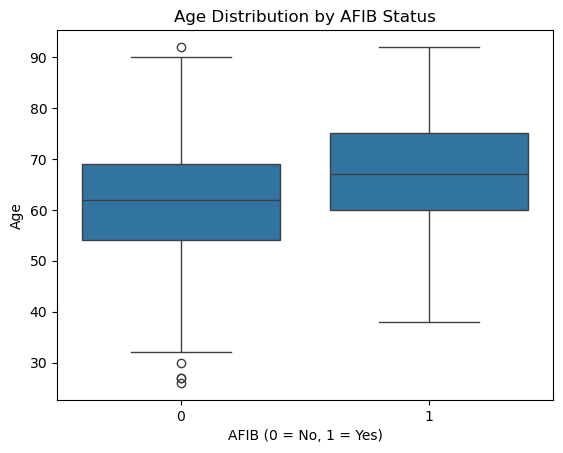

In [35]:
import seaborn as sns
sns.boxplot(x='AFIB', y='age', data=df2)
plt.title('Age Distribution by AFIB Status')
plt.xlabel('AFIB (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

**<span style="color:blue">(1 PT) 13. What do you notice about the difference in age distributions between AFIB/non-AFIB groups?</span>**


In [37]:
median_afib1 = df2[df2['AFIB'] == 1]['age'].median()
median_afib0 = df2[df2['AFIB'] == 0]['age'].median()

In [39]:
print("AFIB:", median_afib1)
print("non-AFIB:", median_afib0)

AFIB: 67.0
non-AFIB: 62.0


Patients with AFIB are typically older than those with non-AFIB. The median age for AFIB patients is 67 years, while the median age for non-AFIB patients is 62 years.
This indicates that AFIB is more prevalent among the elderly.